In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data = data.drop(columns = ['Country','Region'])

In [6]:
data = data.drop(columns = ['Standard Error','Happiness Rank','Dystopia Residual'])
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [ ]:
# Thre are no nan values. Lets check for outliers if there are any .

In [ ]:
# we will be useing graph to understand if there are any outliers. 

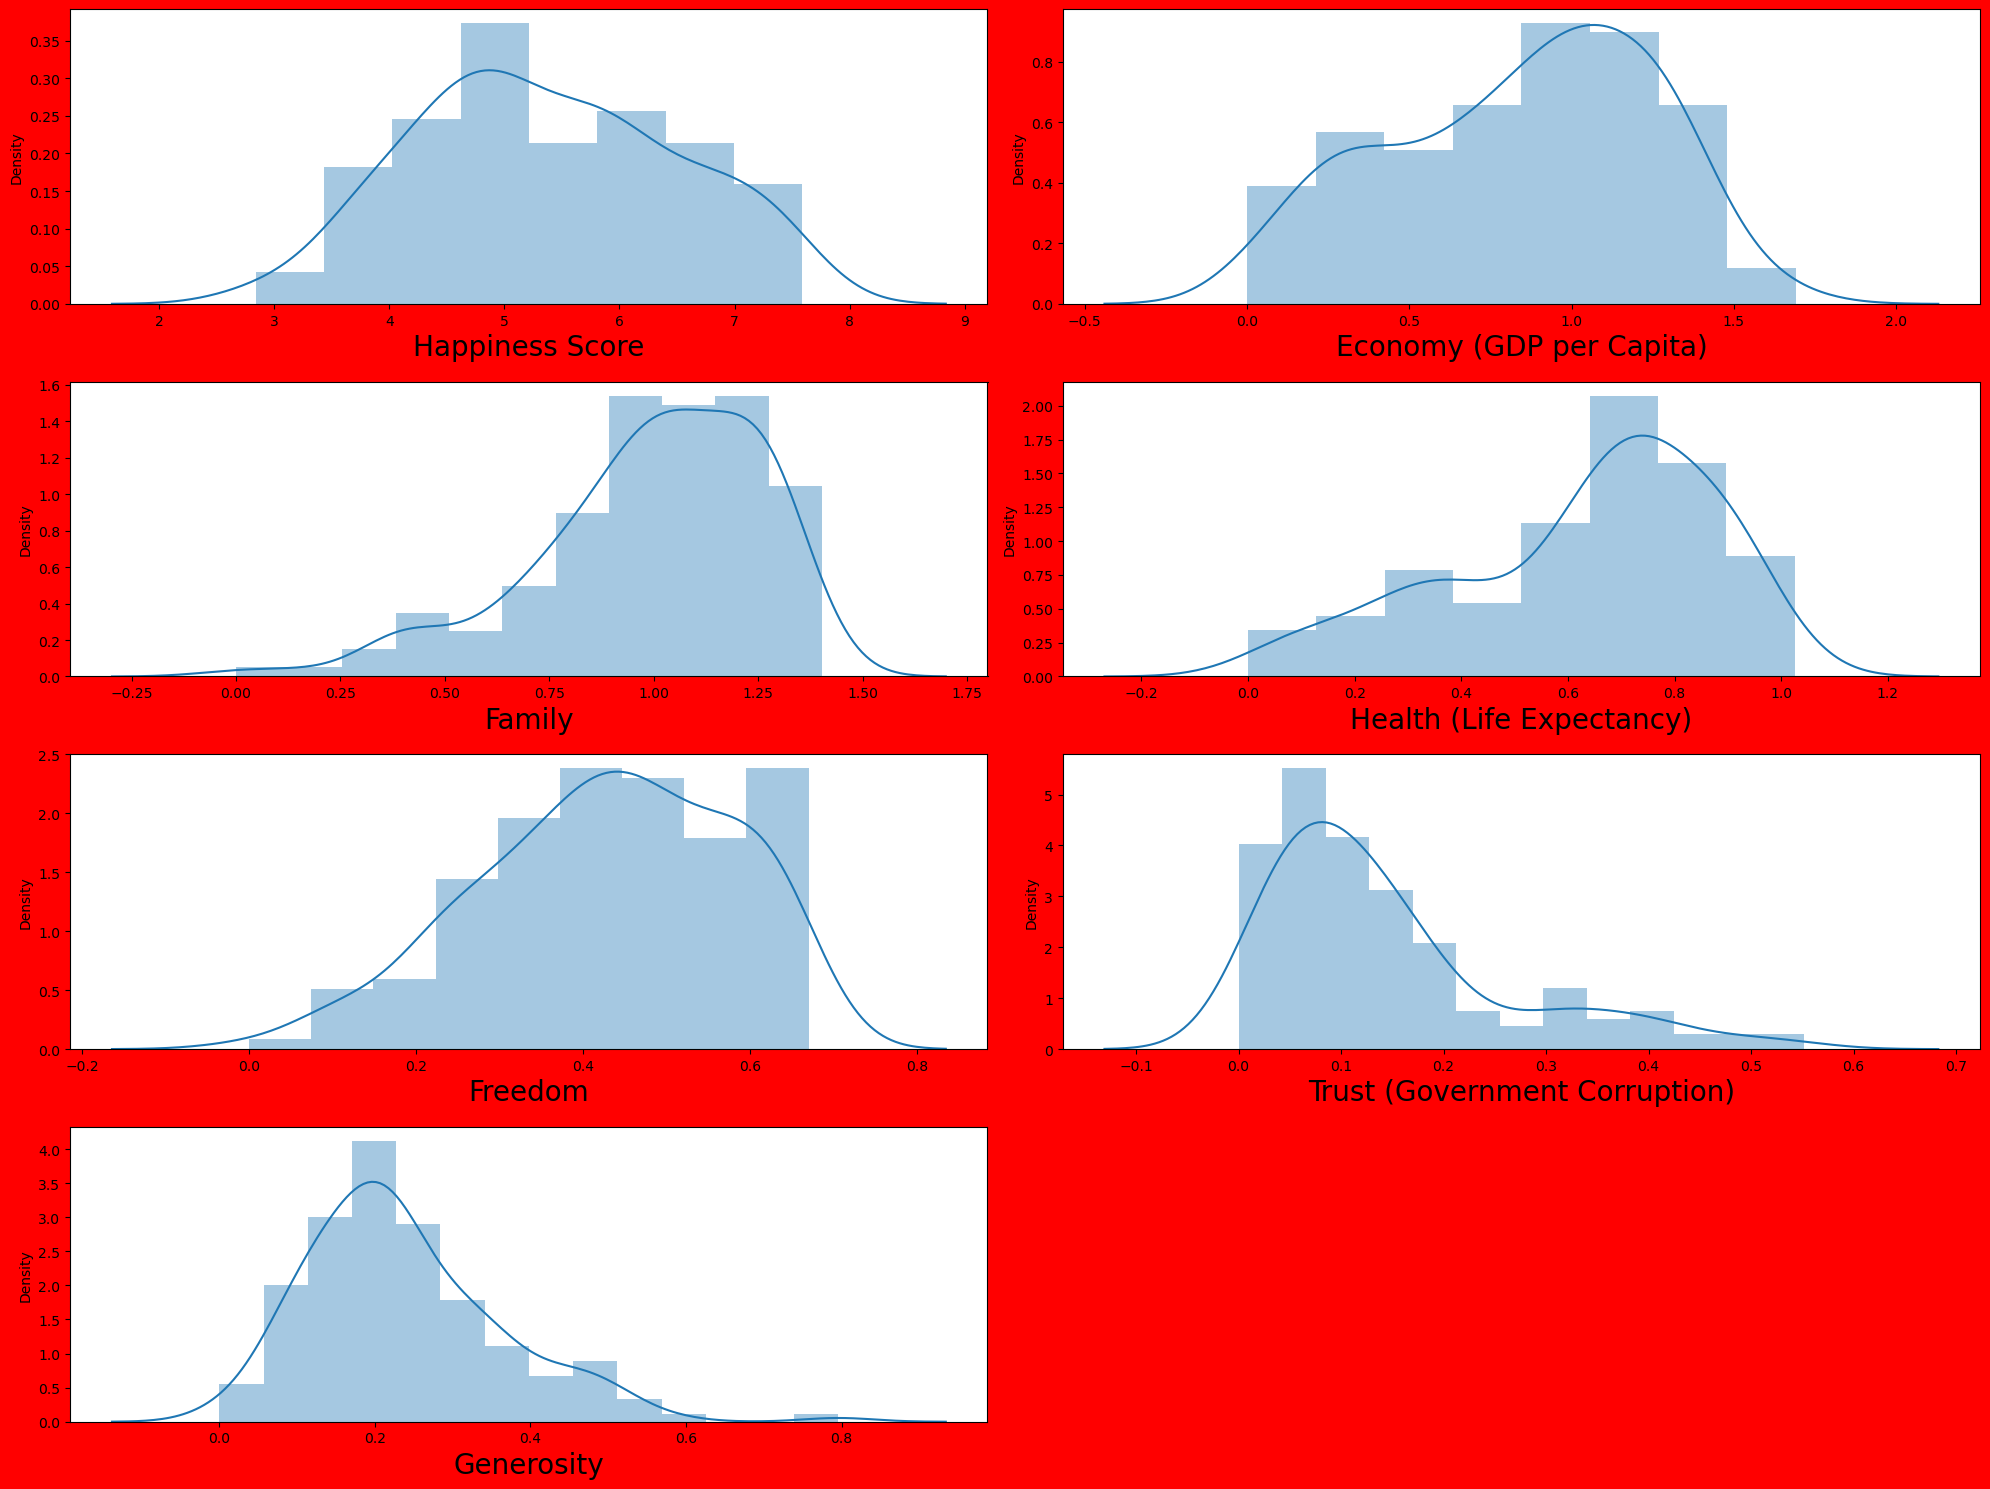

In [7]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=7:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [11]:
# Some skewdness can be found . lets confirm through boxplot.

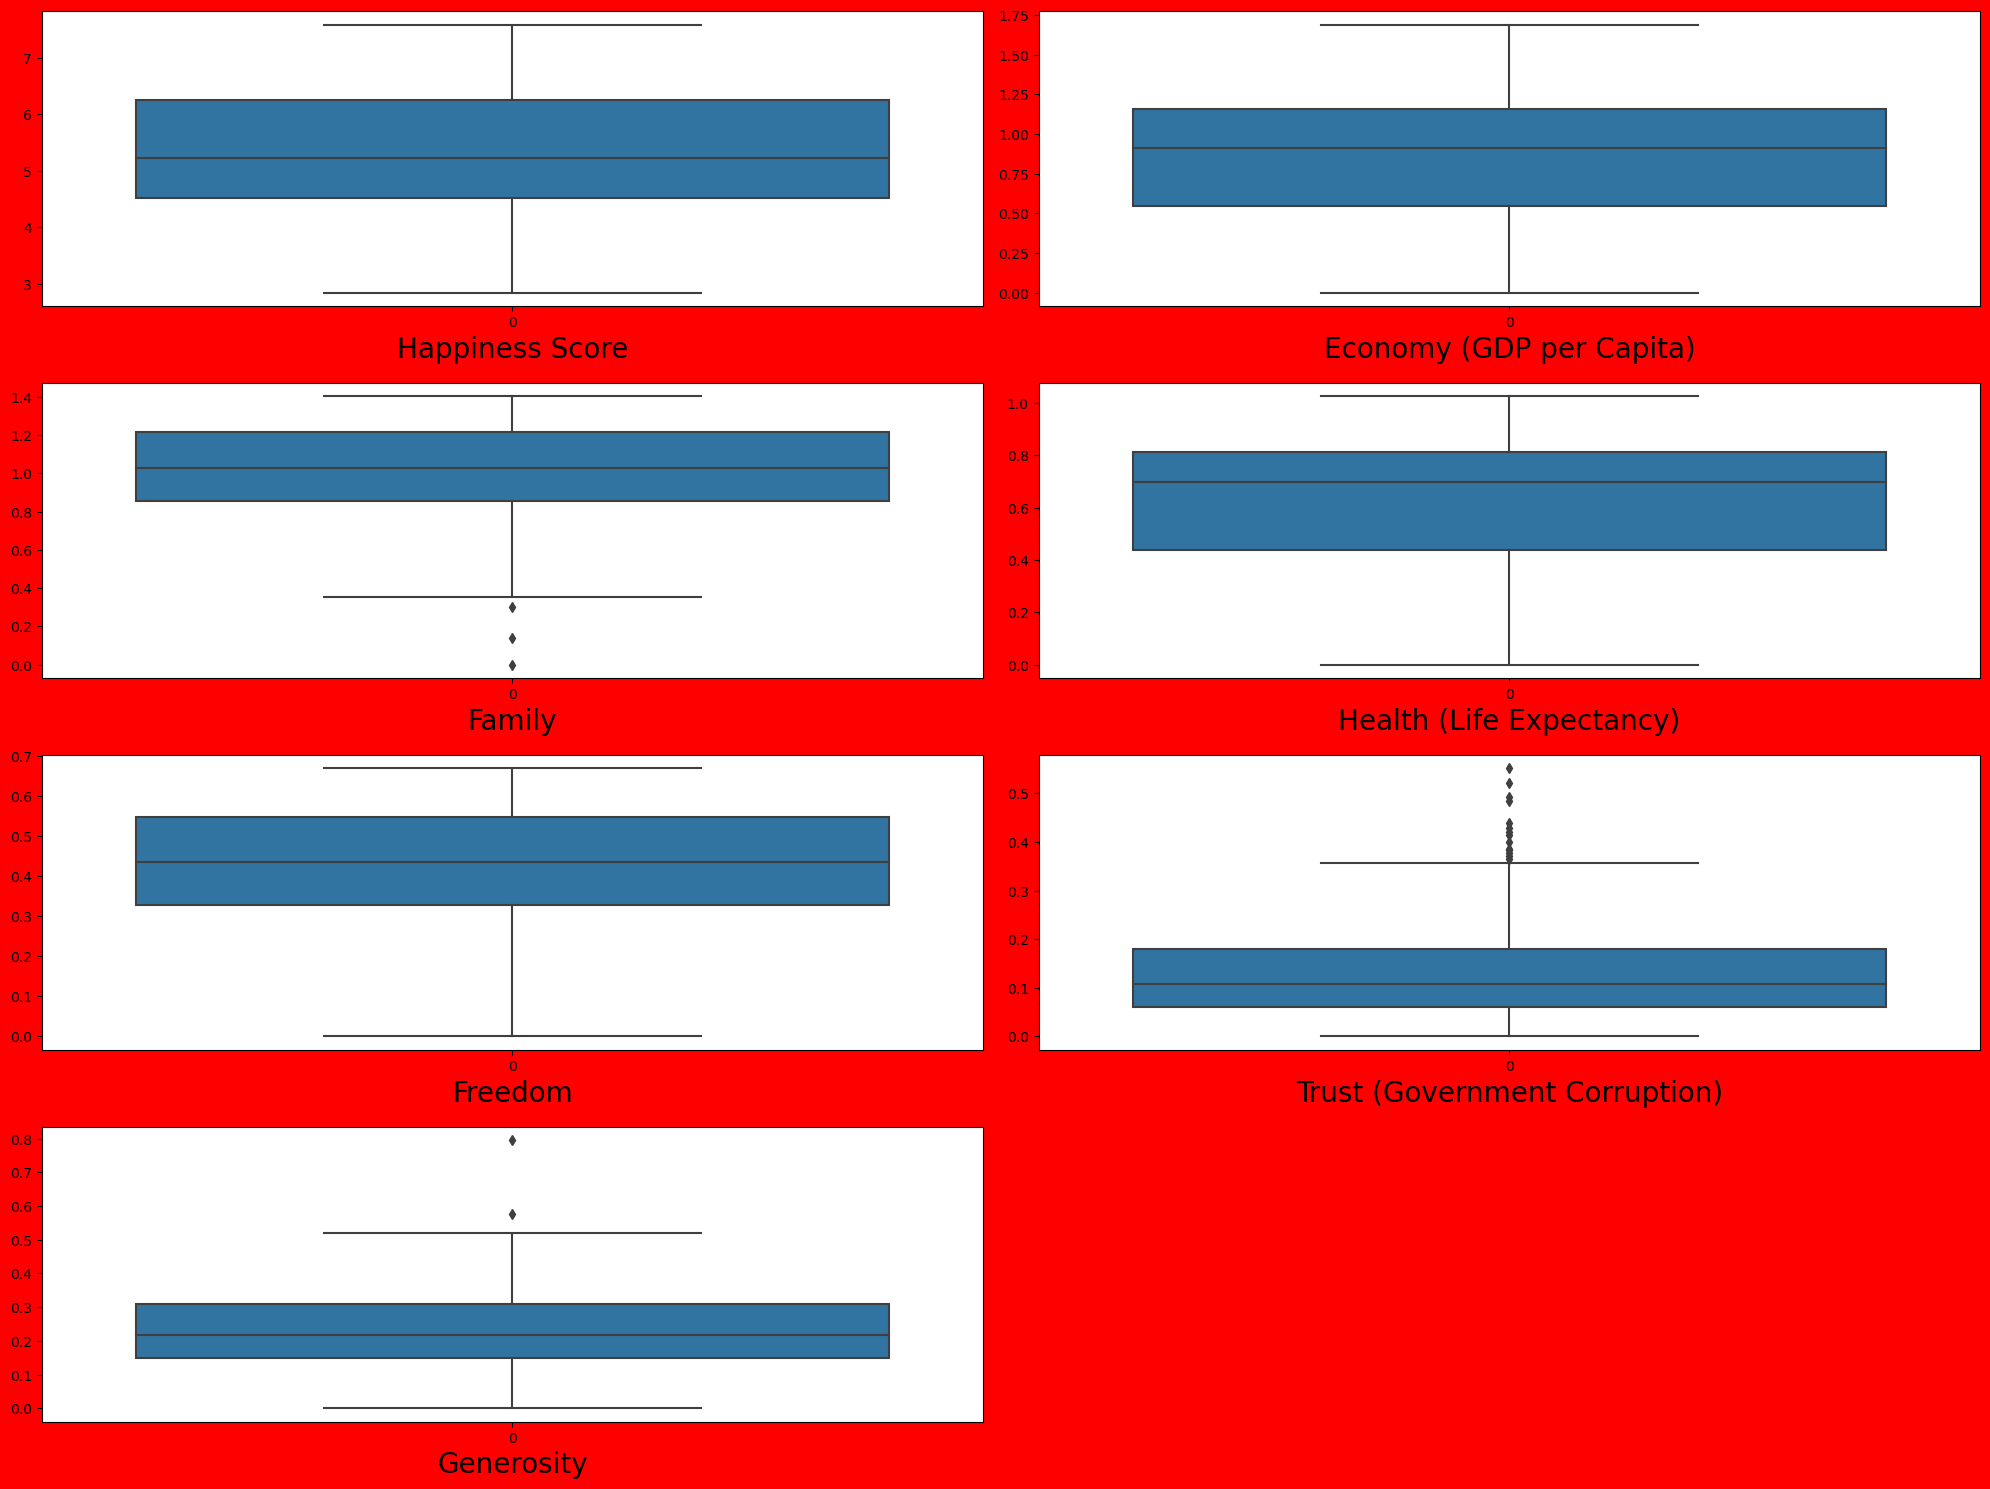

In [8]:
plt.figure(figsize=(20,15), facecolor='red')
graph = 1

for column in data:
    if graph<=7:
        plt.subplot(4,2,graph)
        ax=sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.tight_layout()

In [ ]:
#skewdness can be found in data genorosity, family, and trust.

In [9]:
# Finding inter quartile range to identify outliers.

q1 = data.quantile(0.25)

q3 = data.quantile(0.75)

iqr = q3-q1
               

In [10]:
q1

Happiness Score                  4.526000
Economy (GDP per Capita)         0.545808
Family                           0.856823
Health (Life Expectancy)         0.439185
Freedom                          0.328330
Trust (Government Corruption)    0.061675
Generosity                       0.150553
Name: 0.25, dtype: float64

In [11]:
gen_high = (q3['Generosity'] + (1.5 * iqr['Generosity']))
print (gen_high)

index_4 = np.where(data['Generosity'] > gen_high)

data = data.drop(data.index[index_4])
print (data.shape)

data.reset_index()

0.5488775
(156, 7)


,index,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
151,153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
152,154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
153,155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
154,156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [12]:
fam_low = (q1['Family'] - (1.5 * iqr['Family']))
print (fam_low)

index_5 = np.where(data['Family'] < fam_low)

data = data.drop(data.index[index_5])
print (data.shape)

data.reset_index()

0.32044875000000017
(153, 7)


,index,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
148,151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
149,153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
150,154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
151,155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


In [13]:
tru_high = (q3['Trust (Government Corruption)'] + (1.5 * iqr['Trust (Government Corruption)']))
print (tru_high)

index_2 = np.where(data['Trust (Government Corruption)'] >tru_high)

data = data.drop(data.index[index_2])
print (data.shape)

data.reset_index()

0.35812499999999997
(139, 7)


,index,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
1,4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
2,6,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
3,9,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
4,10,7.278,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172
...,...,...,...,...,...,...,...,...
134,150,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
135,151,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
136,154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
137,155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


In [ ]:
# Just now we treated a outliers.

In [14]:
data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,5.311302,0.827695,0.997031,0.619676,0.411592,0.115954,0.222538
std,1.046995,0.372974,0.242632,0.240979,0.146497,0.082180,0.114146
min,2.905000,0.000000,0.353860,0.000000,0.000000,0.000000,0.000000
25%,4.557500,0.568575,0.862445,0.437975,0.317590,0.058510,0.139110
50%,5.192000,0.895370,1.025070,0.687410,0.416910,0.094720,0.206180
75%,5.985500,1.125205,1.202465,0.788535,0.530730,0.155240,0.280145
max,7.561000,1.554220,1.402230,0.991110,0.662460,0.356370,0.519120


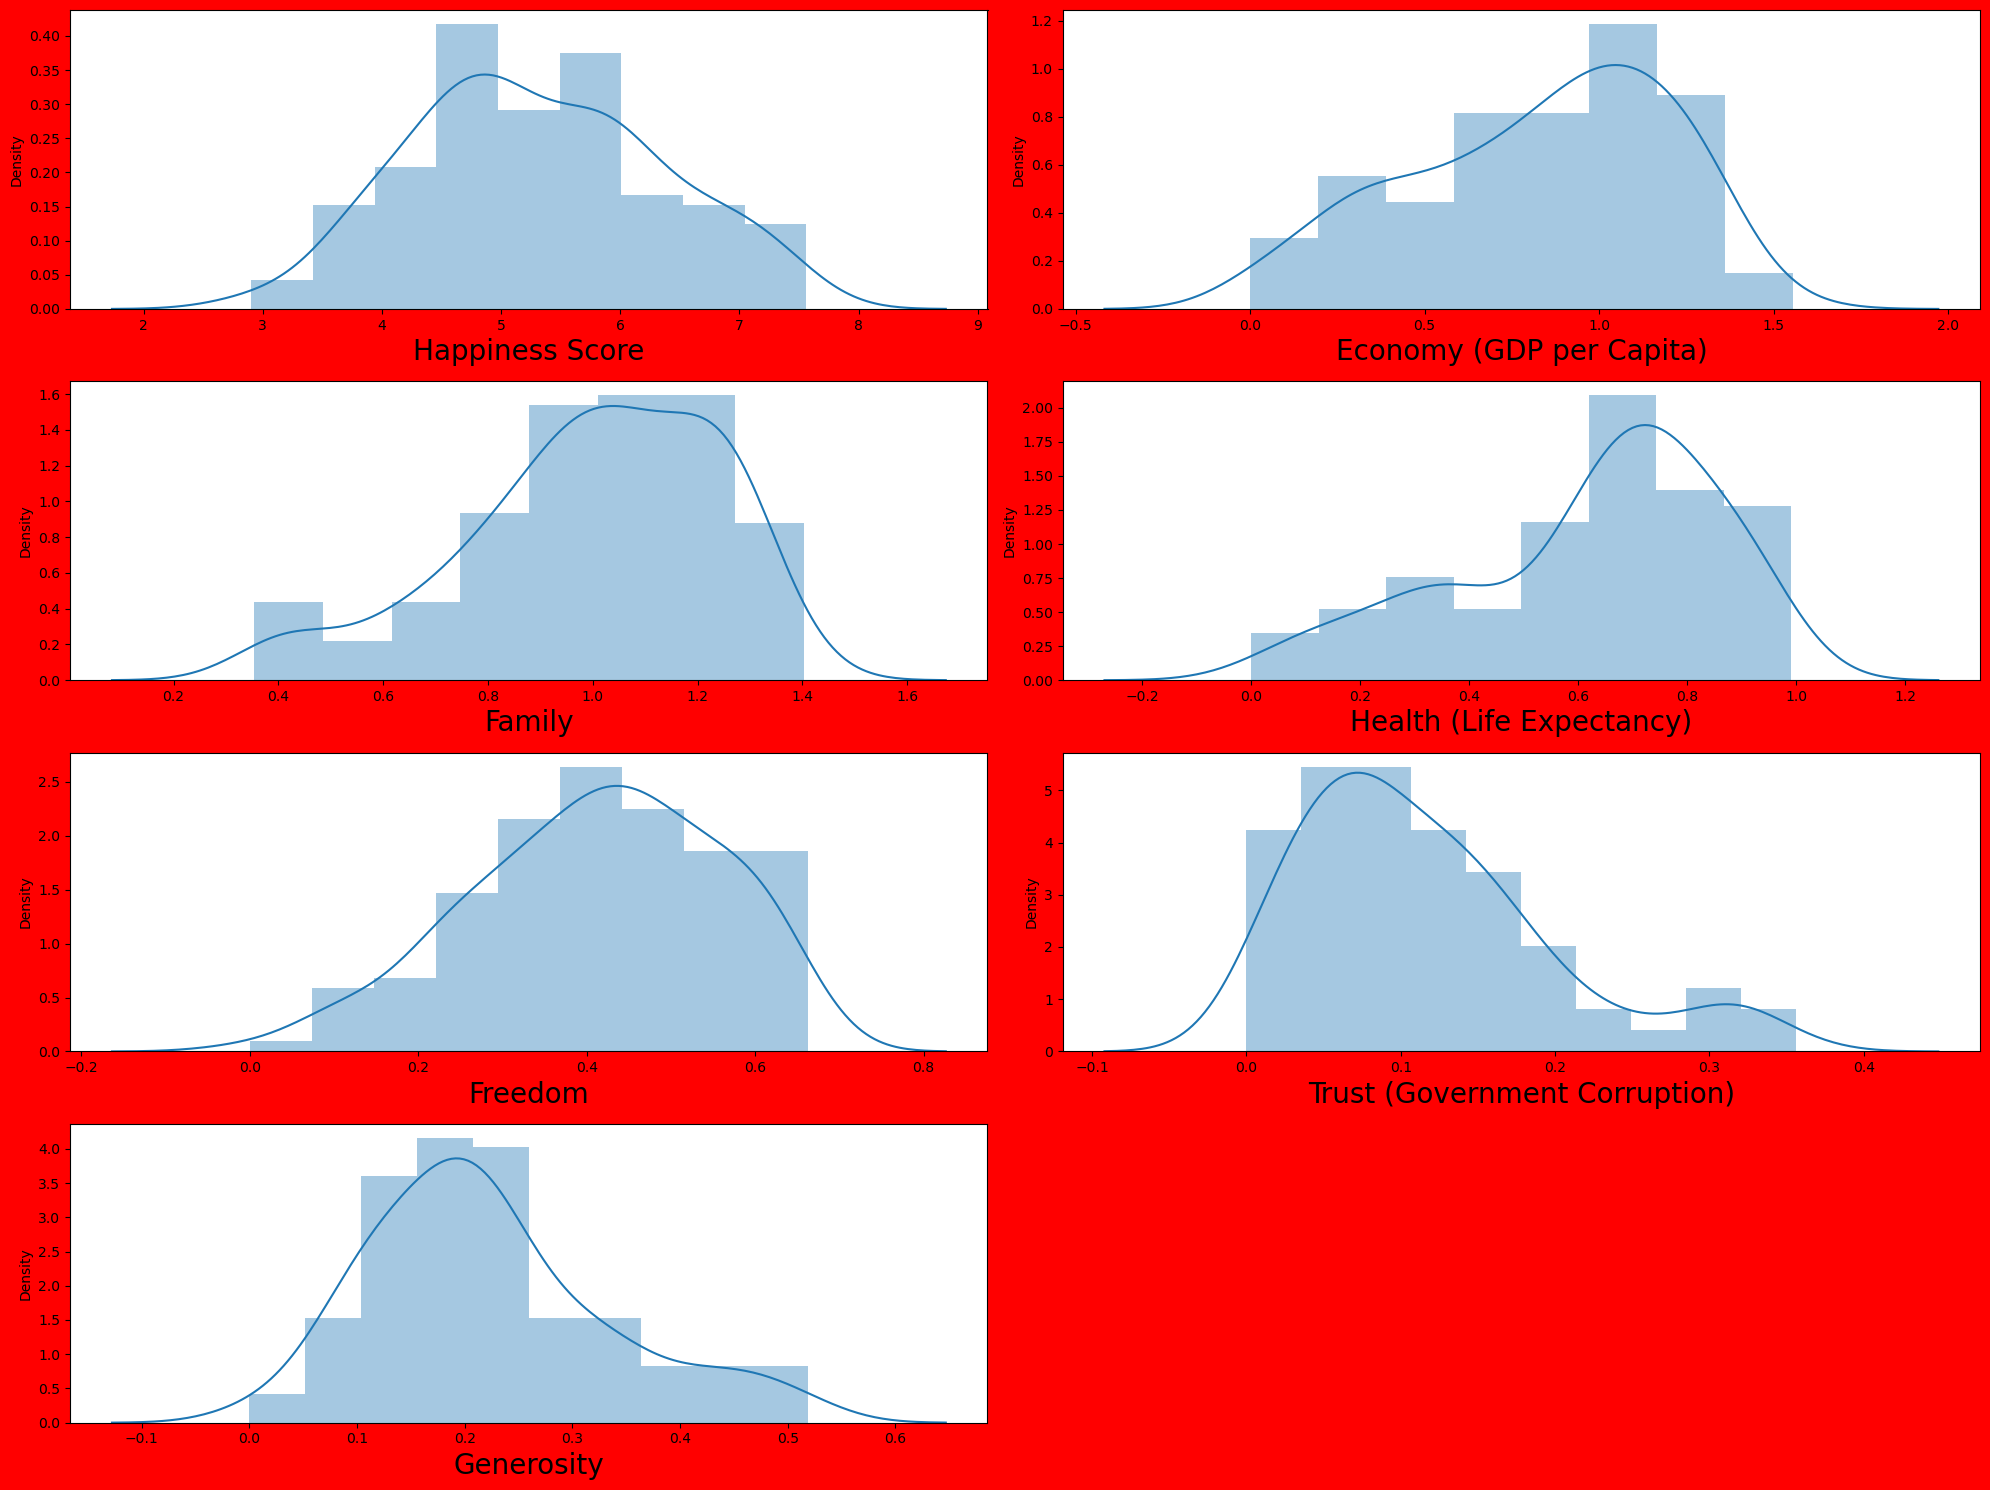

In [15]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in data:
    if plotnumber<=7:
        ax = plt.subplot(4,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
# Divide data into feature and label.

In [16]:
y = data['Happiness Score']
x = data.drop(columns = ['Happiness Score'])

In [17]:
y

1      7.561
4      7.427
6      7.378
9      7.284
10     7.278
       ...  
150    3.655
151    3.587
154    3.340
155    3.006
156    2.905
Name: Happiness Score, Length: 139, dtype: float64

In [18]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
6,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
9,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562
10,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172
...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179


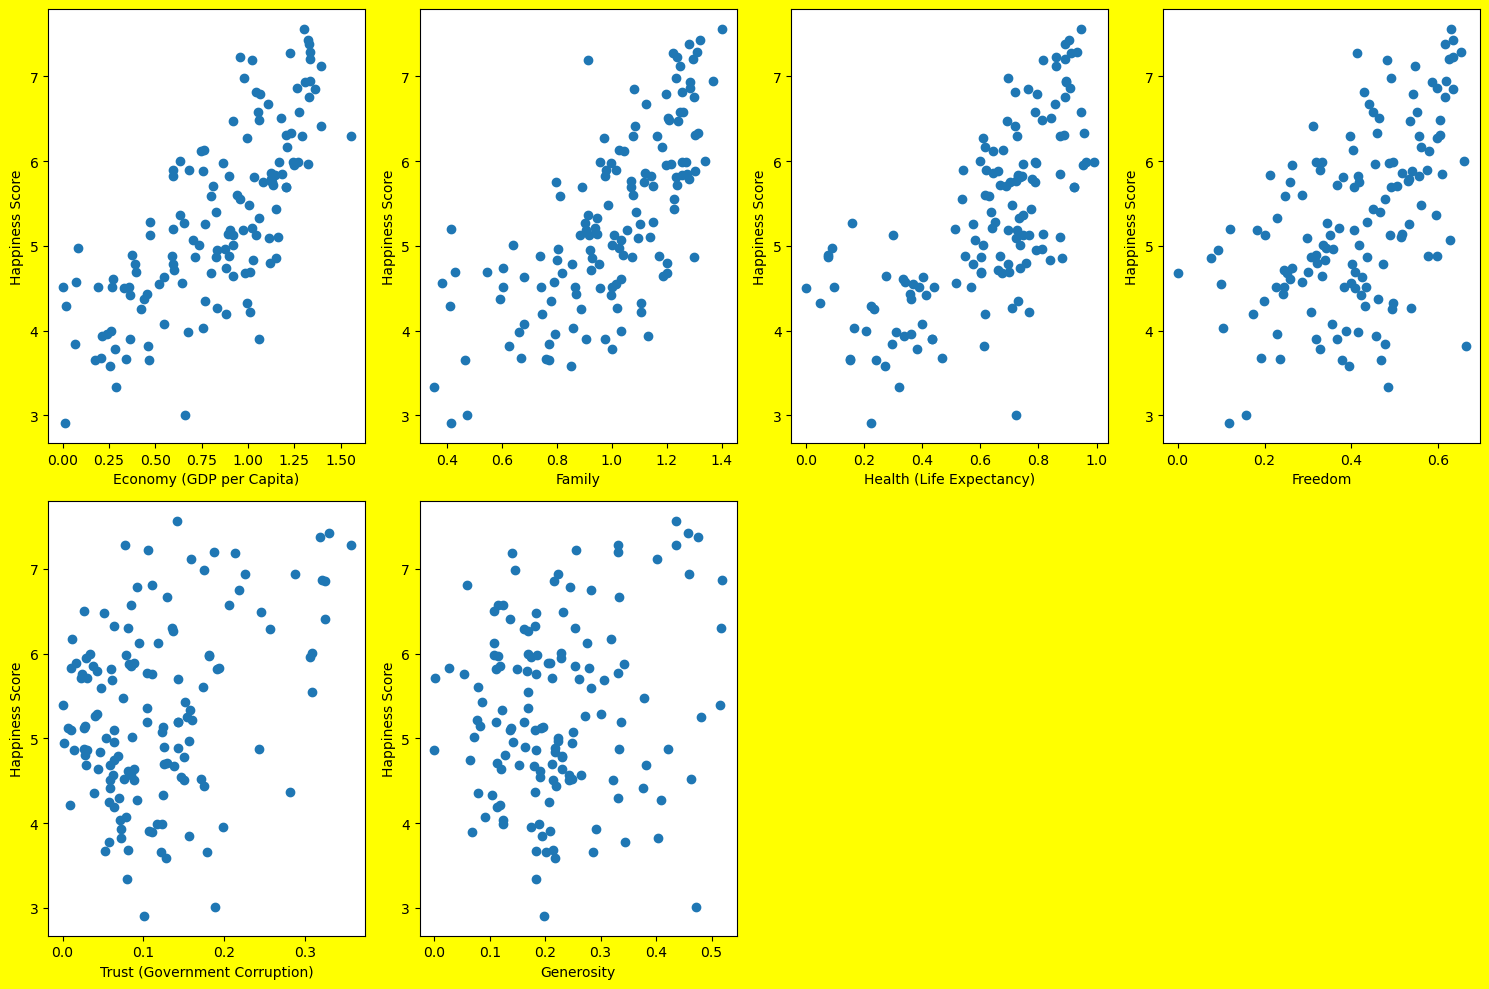

In [19]:
plt.figure(figsize = (15,10), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber<=7 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Happiness Score',fontsize=10)
    plotnumber+=1
    
plt.tight_layout()

In [21]:
# Data scaling.
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled

array([[ 1.27714433e+00,  1.67605473e+00,  1.36672007e+00,
         1.48782800e+00,  3.11372845e-01,  1.87948105e+00],
       [ 1.34164400e+00,  1.34671649e+00,  1.19092619e+00,
         1.51660112e+00,  2.60878025e+00,  2.07124368e+00],
       [ 1.35012017e+00,  1.17116870e+00,  1.13765910e+00,
         1.39869984e+00,  2.46919187e+00,  2.22941927e+00],
       [ 1.36126029e+00,  1.29137178e+00,  1.29891803e+00,
         1.64176418e+00,  2.93607410e+00,  1.87350221e+00],
       [ 1.07869415e+00,  9.38538919e-01,  1.22524369e+00,
         1.09449237e-02, -4.65339420e-01,  9.59970045e-01],
       [ 3.44657214e-01,  9.96241362e-01,  1.00201336e+00,
         1.52201320e+00, -1.23634873e-01,  2.85152012e-01],
       [ 1.37108189e+00,  1.24094936e+00,  1.12758042e+00,
         1.45741070e+00,  8.64719271e-01,  9.52584415e-01],
       [ 5.18916652e-01, -3.41338496e-01,  8.11143100e-01,
         4.81042876e-01,  1.18663964e+00, -7.19205825e-01],
       [ 1.52521378e+00,  1.03442011e+00,  1.008

In [22]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,3.677767,Economy (GDP per Capita)
1,1.838436,Family
2,2.894165,Health (Life Expectancy)
3,1.584100,Freedom
4,1.231772,Trust (Government Corruption)
5,1.248997,Generosity


In [ ]:
# There are no multicolleniarity present.

In [ ]:
# Now we will do train, test, split.

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size = 0.25, random_state = 355)

In [ ]:
# Model building.

In [24]:
y_train.head()

109    4.686
58     5.813
97     4.885
21     6.853
154    3.340
Name: Happiness Score, dtype: float64

In [ ]:
# Model Building.

In [26]:
regression = LinearRegression()

regression.fit(x_train, y_train)

LinearRegression()

In [27]:
data.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
155,3.006,0.6632,0.47489,0.72193,0.15684,0.18906,0.47179
156,2.905,0.0153,0.41587,0.22396,0.11850,0.10062,0.19727


In [29]:
regression.predict(scaler.transform([[0.6632, 0.47489, 0.72193, 0.15684, 0.18906, 0.47179]]))

array([4.13431495])

In [ ]:
# How our model perform with test data .

In [33]:
regression.score(x_test,y_test)

0.3171869435970954

In [32]:
regression.score(x_train,y_train)

0.7972370900298915

In [ ]:
# LETS PLOT AND VISUALIZE

In [34]:
x_test[1]

array([ 0.19988949,  0.23531366,  0.31949496, -0.03413296,  0.32944728,
       -0.98482475])

In [35]:
y_pred = regression.predict(x_test)

In [36]:
y_pred

array([6.31877063, 5.66644828, 4.84022936, 5.68951744, 5.83569891,
       4.62471432, 4.56448767, 6.90785714, 6.37144434, 5.45052726,
       5.42621644, 3.77078191, 6.21203581, 5.4316132 , 5.4268749 ,
       6.0058691 , 6.11700667, 5.21398496, 6.77803819, 5.93355826,
       4.39406158, 5.59901452, 5.12098953, 5.39639375, 7.16643878,
       4.35416819, 3.665956  , 5.49974025, 4.86843414, 6.36663246,
       5.30936109, 5.56508317, 4.50036525, 6.47247012, 4.78042374])

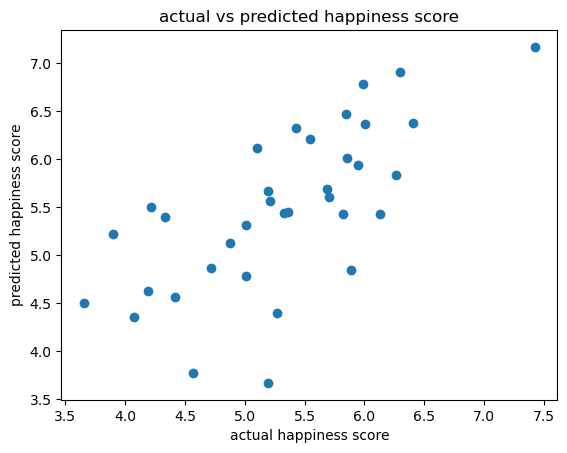

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual vs predicted happiness score')
plt.show()